In [1]:
#import libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



In [2]:
# Parameters
stock_symbol = 'GOOGL'
start_date = '2018-01-01'
end_date = '2024-12-31'
sequence_length = 60




In [3]:
# Fetch and prepare stock data
data = yf.download(stock_symbol, start=start_date, end=end_date)
prices = data['Close'].dropna().values.reshape(-1, 1)

if prices.size == 0:
    raise ValueError(f"No data found for stock symbol '{stock_symbol}' between {start_date} and {end_date}.")



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)



In [5]:
# Create sequences
X = np.array([scaled_prices[i:i + sequence_length] for i in range(len(scaled_prices) - sequence_length)])
y = np.array([scaled_prices[i + sequence_length] for i in range(len(scaled_prices) - sequence_length)])
X = X.reshape(X.shape[0], X.shape[1], 1)



In [6]:
# Split data
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]



In [7]:
# Build LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])



C:\Users\aadhi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Compile and train model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)



Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0368
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0022
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0020
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0021
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0020
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0015
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0015
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0016
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0012
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0016
Epoch 11/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0012
Epoch 12/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0014
Epoch 13/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0015
Epoch 14/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0014
Epoch 15/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0012
Epoc

In [9]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))



11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


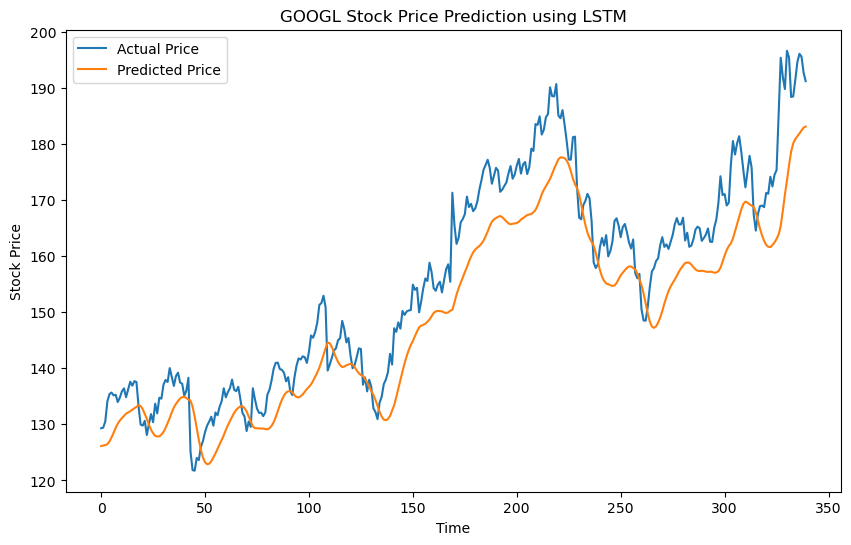

In [10]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title(f'{stock_symbol} Stock Price Prediction using LSTM')
plt.show()